In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [101]:
im1 = cv2.imread('back.jpg', cv2.IMREAD_GRAYSCALE)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

im2 = cv2.imread('test_back1.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Test3')

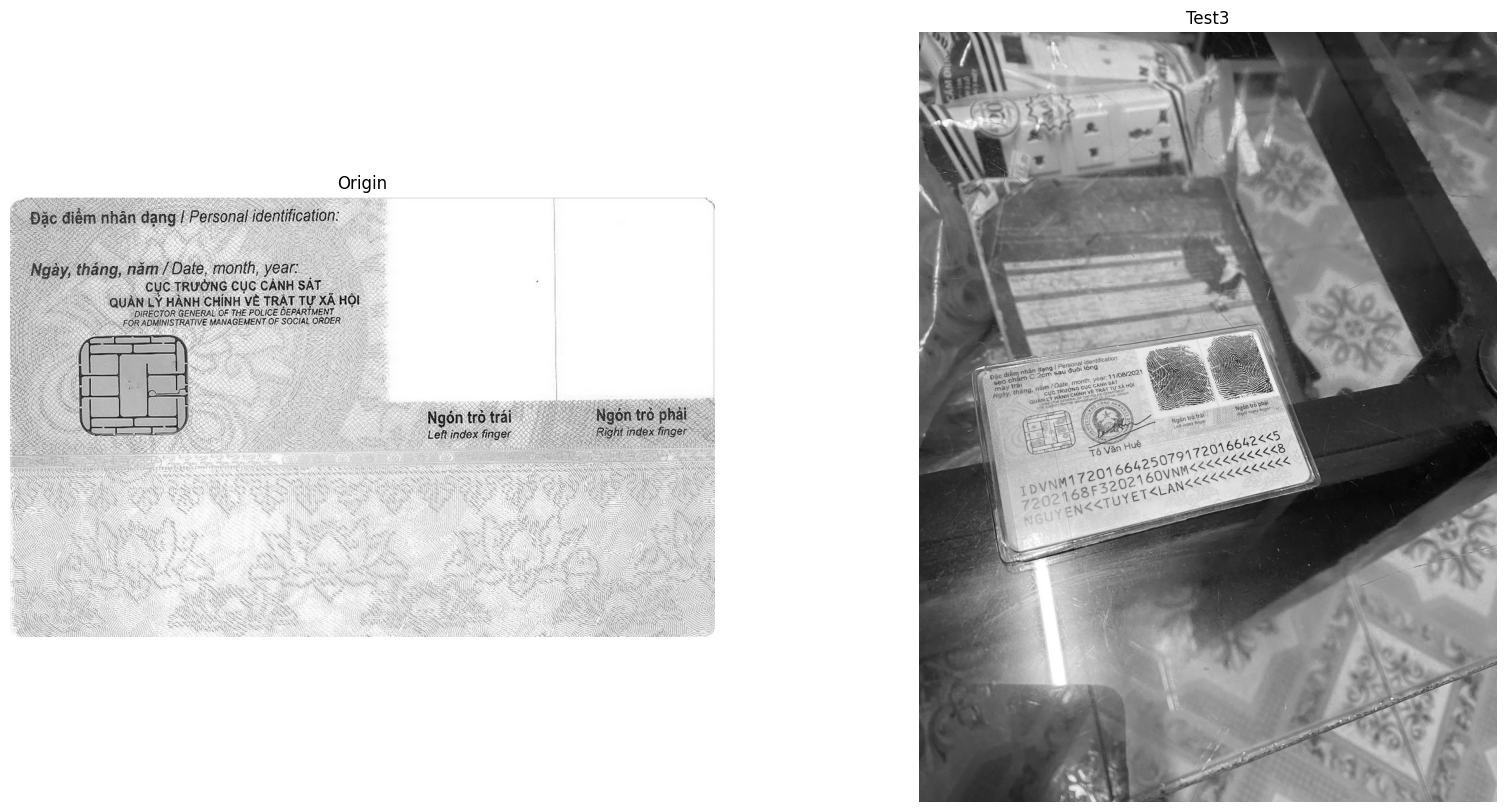

In [102]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off'); plt.imshow(im1); plt.imshow(im1); plt.title('Origin') 
plt.subplot(122);plt.axis('off'); plt.imshow(im2); plt.imshow(im2); plt.title('Test3')

In [103]:
im1_gray = cv2.cvtColor(im1, cv2.COLOR_RGB2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_RGB2GRAY)

MAX_NUM_FEATURES = 10000
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Test3')

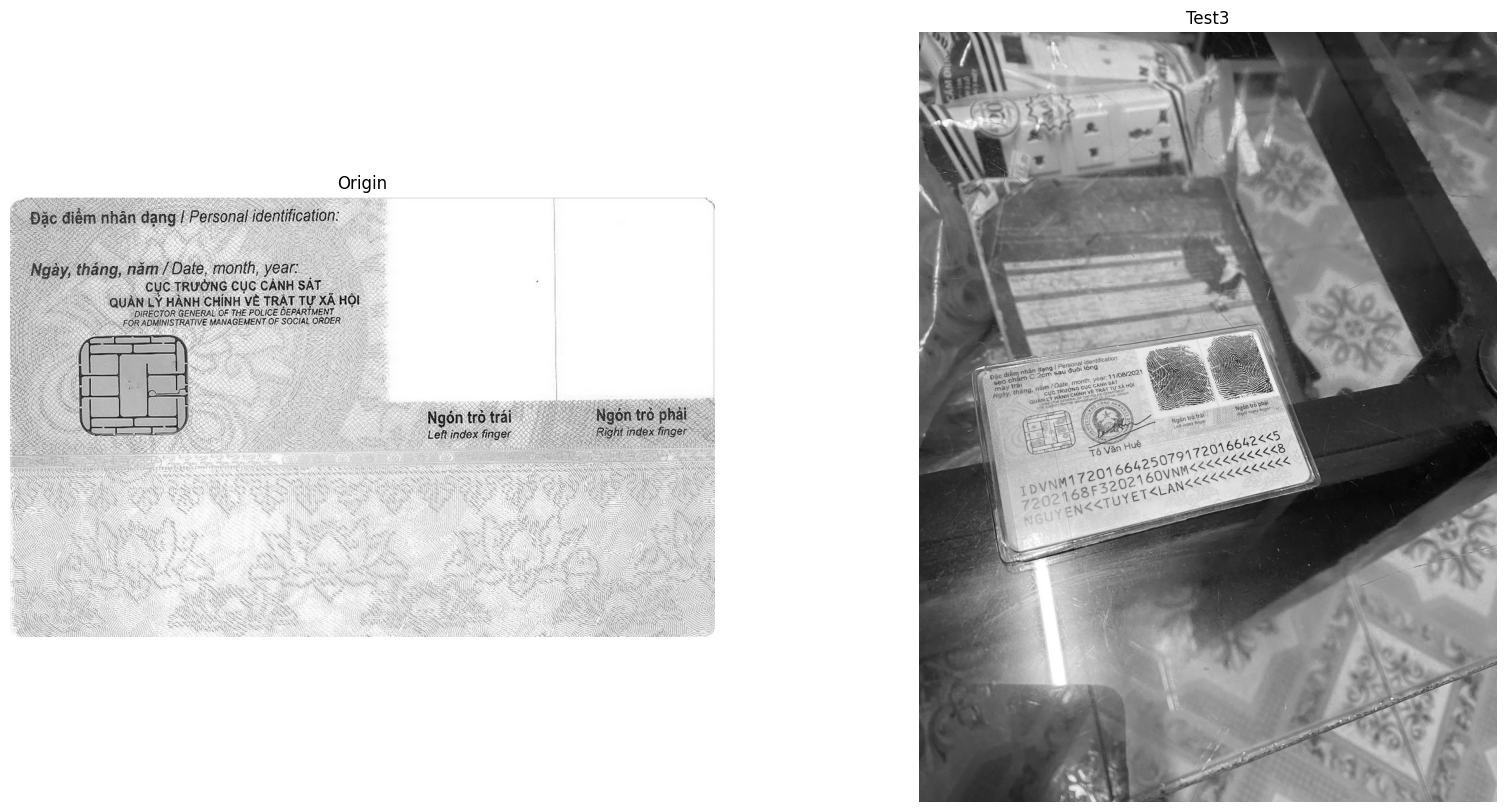

In [104]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off'); plt.imshow(im1_display); plt.imshow(im1); plt.title('Origin') 
plt.subplot(122);plt.axis('off'); plt.imshow(im2_display); plt.imshow(im2); plt.title('Test3')

In [105]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

matches = sorted(matches, key = lambda x:x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

In [106]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Test3 registered')

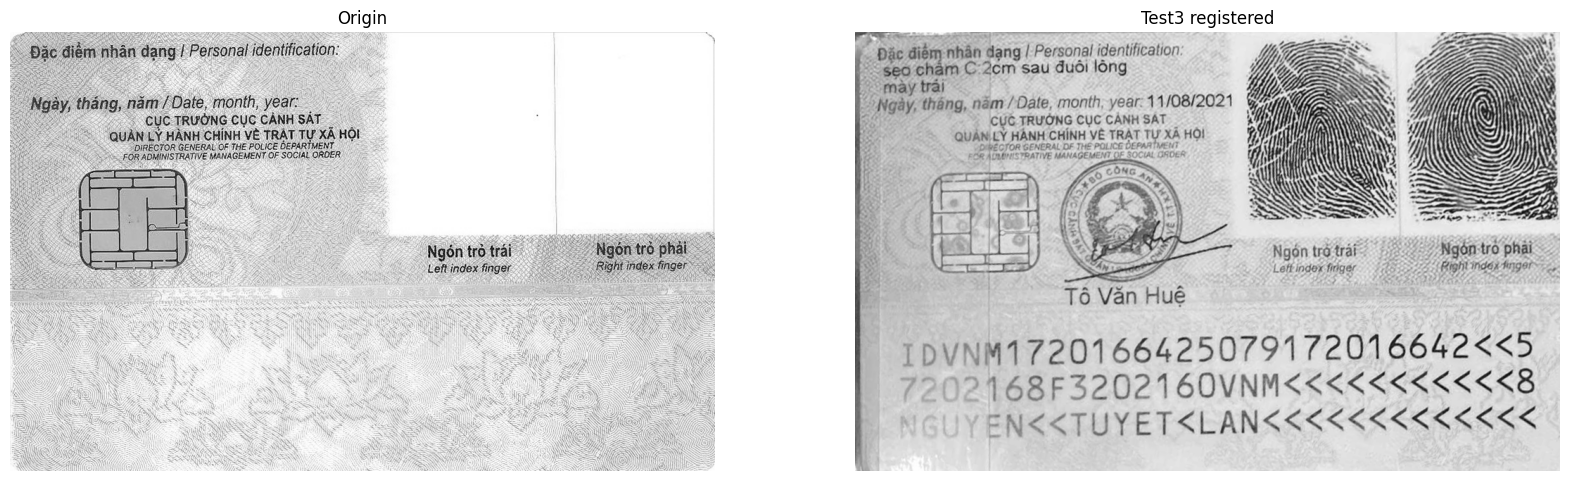

In [107]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off'); plt.imshow(im1); plt.title('Origin')
plt.subplot(122);plt.axis('off'); plt.imshow(im2_reg); plt.title('Test3 registered')

In [1]:
!pyinstaller --onefile -w --icon=tools.ico tools.py

6052 INFO: PyInstaller: 6.10.0, contrib hooks: 2024.8
6052 INFO: Python: 3.11.9 (conda)
6072 INFO: Platform: Windows-10-10.0.22631-SP0
6072 INFO: Python environment: C:\ProgramData\anaconda3
6072 INFO: wrote c:\Users\An\Desktop\project\auto-crop\tools.spec
6084 INFO: Module search paths (PYTHONPATH):
['c:\\Users\\An\\AppData\\Roaming\\Python\\Python311\\Scripts\\pyinstaller.exe',
 'C:\\ProgramData\\anaconda3\\python311.zip',
 'C:\\ProgramData\\anaconda3\\DLLs',
 'C:\\ProgramData\\anaconda3\\Lib',
 'C:\\ProgramData\\anaconda3',
 'C:\\Users\\An\\AppData\\Roaming\\Python\\Python311\\site-packages',
 'C:\\Users\\An\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32',
 'C:\\Users\\An\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib',
 'C:\\Users\\An\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages',
 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\vboxapi-1.0-py3.11.egg',
 'C:\\ProgramData\\anaconda3\\L